In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Rode o arquivo meu_app.py primeiro

### JSON obtido

In [3]:
documento = input('digite o número do documento: ')

doc = requests.get(f'http://localhost:8080/documento/{documento}')
data = json.loads(doc.text)
data

digite o número do documento: 334-50


{'assumed_coobligation': 0.0,
 'disagreement_operation_count': 0,
 'disagreement_operation_value': 0.0,
 'financial_institution_count': 12,
 'indirect_risk': 0.0,
 'operation_count': 337,
 'operation_items': [{'category_sub': {'category': {'category_code': 2,
     'category_description': 'Empréstimos'},
    'category_sub_code': '13',
    'description': 'cheque especial'},
   'due_type': {'description': 'Créditos a vencer de 91 a 180 dias',
    'due_code': 140,
    'due_type_group': 'A vencer'},
   'due_value': 42349.05,
   'exchange_variation': 'N'},
  {'category_sub': {'category': {'category_code': 2,
     'category_description': 'Empréstimos'},
    'category_sub_code': '13',
    'description': 'cheque especial'},
   'due_type': {'description': 'Créditos a vencer até 30 dias',
    'due_code': 110,
    'due_type_group': 'A vencer'},
   'due_value': 503864.59,
   'exchange_variation': 'N'},
  {'category_sub': {'category': {'category_code': 19,
     'category_description': 'Limite'},
   

In [ ]:
# caso tenha algum problema e a célula acima não retorne o json, rode as linhas abaixo desta célula
#doc = requests.get('http://www.mocky.io/v2/5ed926833100006900c4eb93')
#data = json.loads(doc.text)
#data

### Gerando um DataFrame

In [5]:
matriz_operations = []

for operation in data['operation_items']:
    
    category_code = operation['category_sub']['category']['category_code']
    category_description = operation['category_sub']['category']['category_description']
    category_sub_code = operation['category_sub']['category_sub_code']
    category_sub_description = operation['category_sub']['description']

    due_description = operation['due_type']['description']
    due_code = operation['due_type']['due_code']
    due_type_group = operation['due_type']['due_type_group']
    
    due_value = operation['due_value']
    
    exchange_variation = operation['exchange_variation']
    
    matriz_operations.append([category_code, category_description, category_sub_code, 
                              category_sub_description, due_description, due_code, 
                              due_type_group, due_value, exchange_variation])

df = pd.DataFrame(matriz_operations, 
                  columns=['category_code', 'category_description', 'category_sub_code', 'category_sub_description', 
                           'due_description', 'due_code', 'due_type_group', 'due_value', 'exchange_variation'])


def change_description(x):
    if 'Limite' in x:
        return 'k - ' + x
    elif ' 30 ' in x:
        return 'a - ' + x
    elif ' 60 ' in x:
        return 'b - ' + x
    elif ' 90 ' in x:
        return 'c - ' + x
    elif ' 180 ' in x:
        return 'd - ' + x
    elif ' 360 ' in x:
        return 'e - ' + x
    elif ' 720 ' in x:
        return 'f - ' + x
    elif ' 1080 ' in x:
        return 'g - ' + x
    elif ' 1440 ' in x:
        return 'h - ' + x
    elif ' 1800 ' in x:
        return 'i - ' + x
    elif ' 5400 ' in x:
        return 'j - ' + x
    

df.due_description = df.due_description.apply(change_description)

df

,category_code,category_description,category_sub_code,category_sub_description,due_description,due_code,due_type_group,due_value,exchange_variation
0,2,Empréstimos,13,cheque especial,d - Créditos a vencer de 91 a 180 dias,140,A vencer,42349.05,N
1,2,Empréstimos,13,cheque especial,a - Créditos a vencer até 30 dias,110,A vencer,503864.59,N
2,19,Limite,1,contratado e não utilizado,k - Limite de crédito com vencimento até 360 dias,20,Limite de Credito,3820370.88,N
3,4,Financiamentos,1,aquisição de bens – veículos automotores,d - Créditos a vencer de 91 a 180 dias,140,A vencer,14324.44,N
4,4,Financiamentos,1,aquisição de bens – veículos automotores,e - Créditos a vencer de 181 a 360 dias,150,A vencer,27285.95,N
5,4,Financiamentos,1,aquisição de bens – veículos automotores,f - Créditos a vencer de 361 a 720 dias,160,A vencer,49555.44,N
6,4,Financiamentos,1,aquisição de bens – veículos automotores,a - Créditos a vencer até 30 dias,110,A vencer,4983.36,N
7,4,Financiamentos,1,aquisição de bens – veículos automotores,b - Créditos a vencer de 31 a 60 dias,120,A vencer,4932.37,N
8,4,Financiamentos,1,aquisição de bens – veículos automotores,c - Créditos a vencer de 61 a 90 dias,130,A vencer,4878.45,N
9,4,Financiamentos,1,aquisição de bens – veículos automotores,g - Créditos a vencer de 721 a 1080 dias,165,A vencer,33179.00,N


### Alguns Relatórios

**a) créditos X prazo a vencer**

In [8]:
df_plot = pd.DataFrame(df.sort_values('due_description').groupby('due_description').due_value.sum())

df_plot = df_plot.reset_index().drop(10)

df.sort_values('due_description').groupby('due_description').due_value.sum()

due_description
a - Créditos a vencer até 30 dias                    7064999.38
b - Créditos a vencer de 31 a 60 dias                2787218.87
c - Créditos a vencer de 61 a 90 dias                2936245.09
d - Créditos a vencer de 91 a 180 dias               2628183.29
e - Créditos a vencer de 181 a 360 dias              4206044.72
f - Créditos a vencer de 361 a 720 dias              5274514.66
g - Créditos a vencer de 721 a 1080 dias             7785159.85
h - Créditos a vencer de 1081 a 1440 dias             714251.36
i - Créditos a vencer de 1441 a 1800 dias             648616.10
j - Créditos a vencer de 1801 a 5400 dias              21452.19
k - Limite de crédito com vencimento até 360 dias    3820370.88
Name: due_value, dtype: float64

**b) créditos X sub-categoria**

In [9]:
df.sort_values('category_sub_description').groupby('category_sub_description').due_value.sum()

category_sub_description
adiantamentos a depositantes                                                13333.64
aquisição de bens – veículos automotores                                   139139.01
arrendamento financeiro exceto veículos automotores e imóveis             6002997.59
beneficiários de garantias prestadas para operações com PJ financeira     6492956.97
beneficiários de garantias prestadas para operações com outras pessoas    5720026.76
capital de giro com prazo de vencimento até 365 d                         1008698.69
capital de giro com prazo vencimento superior 365 d                       5176491.64
cheque especial                                                            546213.64
conta garantida                                                           3316455.58
contratado e não utilizado                                                3820370.88
desconto de duplicatas                                                    5650371.99
Name: due_value, dtype: float64

**c) créditos X categoria**

In [10]:
df.sort_values('category_description').groupby('category_description').due_value.sum()

category_description
Adiantamentos a depositantes                               13333.64
Coobrigações                                            12212983.73
Empréstimos                                             10047859.55
Financiamentos                                            139139.01
Limite                                                   3820370.88
Operações de arrendamento                                6002997.59
Títulos descontados Direitos creditórios descontados     5650371.99
Name: due_value, dtype: float64

**d) créditos X categoria-prazo**

In [11]:
df.sort_values('category_description').groupby(['category_description', 'due_description']).due_value.sum()

category_description                                  due_description                                  
Adiantamentos a depositantes                          a - Créditos a vencer até 30 dias                      13333.64
Coobrigações                                          b - Créditos a vencer de 31 a 60 dias                 462464.15
                                                      c - Créditos a vencer de 61 a 90 dias                 275864.15
                                                      d - Créditos a vencer de 91 a 180 dias                738328.30
                                                      e - Créditos a vencer de 181 a 360 dias              1636280.23
                                                      f - Créditos a vencer de 361 a 720 dias              2490849.22
                                                      g - Créditos a vencer de 721 a 1080 dias             6609197.68
Empréstimos                                           a - Créditos a v

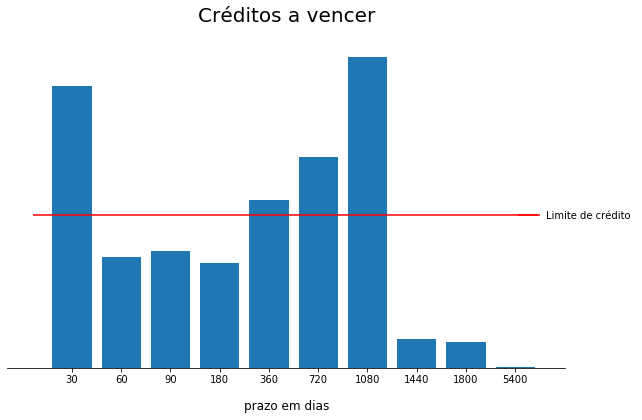

In [12]:
plt.figure(figsize=(10, 6))  

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.bar(df_plot['due_description'], df_plot['due_value'])
plt.hlines(3820370.88, -0.8, 9.5, colors='r', label='Limite de crédito')

plt.title("Créditos a vencer", fontsize=20, pad=20)
plt.xticks(list(range(10)), ('30', '60', '90', '180', '360', '720', '1080', '1440', '1800', '5400'))
plt.yticks([])
plt.legend(loc='center left', bbox_to_anchor=(0.9, 0.468), frameon=False)
plt.xlabel('prazo em dias', labelpad=15, fontsize=12)
plt.show()

### Risco de crédito

In [18]:
df[df.category_code != 19].due_value.sum()/df.due_value.sum()

0.8991642200789091

Quanto ao cálculo do Risco, acredito que levar em consideração os prazos dos créditos a receber relacionados com o limite de crédito de mesmo período, a capacidade do tomador assumir a dívida e a credibilidade do pagamento dos créditos à vencer dentro do prazo, seriam bons indicativos para o cálculo do risco, ao invés de apenas utilizar os valores brutos de créditos a receber e limite.

